<a href="https://colab.research.google.com/github/ahams/analyticApproach/blob/master/TimeSeries_Forecasting_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start rmagic in Notebook
https://rpy2.github.io/doc/v3.0.x/html/interactive.html#module-rpy2.ipython.rmagic

In [ ]:
%load_ext rpy2.ipython


To ensure R packages persist over mutilple session, we will have to use the below few steps to download R package to the local directory in Colab.
https://stackoverflow.com/questions/63594521/install-a-r-package-permanently-in-google-colab

To download package first and then download it to src directory in the colab and link the directory for future sessions

In [ ]:
%%R
.libPaths()
installed.packages()

In [ ]:
%%R
#install.packages(c("quantmod","tidyquant","RSQLite","tsibble","fpp3","fable","dynlm"))
#install.packages(c("DBI","readr","lubridate","tidyr","dbplyr"))
#install.packages(c("dynlm","forecast","RSQLite"))
install.packages("forecast")
tar("library.tar.gz", "/usr/local/lib/R/site-library")


R[write to console]: Installing package into ‘/content/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/xts_0.12.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 517875 bytes (505 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons

In [ ]:
%cp library.tar.gz /content/drive/MyDrive/src

In [ ]:
!tar xf library.tar.gz

tar: Removing leading `/' from member names


In [ ]:
%%R
.libPaths('usr/local/lib/R/site-library/')

In [ ]:
%%R
library(forecast)

R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

R[write to console]: This is forecast 8.16 
  Need help getting started? Try the online textbook FPP:
  http://otexts.com/fpp2/



Below two cell depict how to use R with python environment in Colab

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})

In [ ]:
%%R -i df -w 5 -h 5 --units in -r 200
# import df from global environment
# make default figure size 5 by 5 inches with 200 dpi resolution
emp_data <- data.frame(
   emp_id = c (1:5), 
   emp_name = c("Rick","Dan","Michelle","Ryan","Gary"),
   salary = c(623.3,515.2,611.0,729.0,843.25), 
   
   start_date = as.Date(c("2012-01-01", "2013-09-23", "2014-11-15", "2014-05-11",
      "2015-03-27")),
   stringsAsFactors = FALSE
)
# install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
# library(ggplot2)
# ggplot(df, aes(x=cups_of_coffee, y=productivity)) + geom_line()

Get data from R to Python, we can use -o or Rpull

In [ ]:
%R-o emp_data

df1=pd.DataFrame(emp_data)
print(df1)


   emp_id  emp_name  salary  start_date
1       1      Rick  623.30     15340.0
2       2       Dan  515.20     15971.0
3       3  Michelle  611.00     16389.0
4       4      Ryan  729.00     16201.0
5       5      Gary  843.25     16521.0


Now time for some modelling:-Lets apply time series model from R to Python 

In [ ]:
# try to formalise the analysis for every type of data
# first read the data from the subset file

''' THIS IS THE WORKING MODEL 

'''

import html5lib
import datetime
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from statistics import mean
import warnings
#warnings.filterwarnings("ignore",category=DeprecationWarning)

warnings.filterwarnings("ignore")

In [ ]:
#stk=pd.read_csv("/content/drive/MyDrive/sos_scheme.csv",index_col=False,usecols=["Symbol","Applicable Step value"])
#stk=pd.read_csv("/sos_scheme.csv")
#stk.to_pickle("stk_gap.pickle")
#stk_gap=pd.read_pickle("stk_gap.pickle")
exp_date=pd.read_csv("/content/drive/MyDrive/Expiry2022.csv",index_col=False,usecols=["Expiry_format"])
#exp_date.to_pickle("exp_date.pickle")


In [ ]:
print(exp_date["Expiry_format"].to_list())



['6 - Jan - 2022', '13 - Jan - 2022', '20 - Jan - 2022', '27 - Jan - 2022', '3 - Feb - 2022', '10 - Feb - 2022', '17 - Feb - 2022', '24 - Feb - 2022', '3 - Mar - 2022', '10 - Mar - 2022', '17 - Mar - 2022', '24 - Mar - 2022', '31 - Mar - 2022', '7 - Apr - 2022', '13 - Apr - 2022', '21 - Apr - 2022', '28 - Apr - 2022', '5 - May - 2022', '12 - May - 2022', '19 - May - 2022', '26 - May - 2022', '2 - Jun - 2022', '9 - Jun - 2022', '16 - Jun - 2022', '23 - Jun - 2022', '30 - Jun - 2022', '7 - Jul - 2022', '14 - Jul - 2022', '21 - Jul - 2022', '28 - Jul - 2022', '4 - Aug - 2022', '11 - Aug - 2022', '18 - Aug - 2022', '25 - Aug - 2022', '1 - Sep - 2022', '8 - Sep - 2022', '15 - Sep - 2022', '22 - Sep - 2022', '29 - Sep - 2022', '6 - Oct - 2022', '13 - Oct - 2022', '20 - Oct - 2022', '27 - Oct - 2022', '3 - Nov - 2022', '10 - Nov - 2022', '17 - Nov - 2022', '24 - Nov - 2022', '1 - Dec - 2022', '8 - Dec - 2022', '15 - Dec - 2022', '22 - Dec - 2022', '29 - Dec - 2022']


In [ ]:
getScript=input('StockCode? AXISBANK,BHARTIARTL,ICICIBANK,IDEA,INDUSINDBK,INFY,HDFC,LT,M&M,MARUTI,RELIANCE,SBIN,SUNPHARMA,TCS,YESBANK--') 
getScript=getScript.upper()

StockCode? AXISBANK,BHARTIARTL,ICICIBANK,IDEA,INDUSINDBK,INFY,HDFC,LT,M&M,MARUTI,RELIANCE,SBIN,SUNPHARMA,TCS,YESBANK--nifty


In [ ]:
#import library
import sqlite3 as db
import pandas as pd
con = db.connect('/content/drive/MyDrive/OptionAnalysis.db')
# to pull relevNT SCRIPT ONLY
result_pd = pd.read_sql_query('SELECT * FROM "2017-21" WHERE SYMBOL_x =="{}"'.format(getScript),con)
result_pd = result_pd.reset_index()
# replace error & nan values
result_pd.replace([np.inf, -np.inf], np.nan, inplace=True)
result_pd.fillna(0, inplace=True)

In [ ]:
%%R
# library(forecast)
library(lubridate)
# library(dynlm)
library(DBI)
# library(RSQLite)
library(tidyverse)
library(dbplyr)
library(readr)

In [ ]:
%%R
con <- dbConnect(RSQLite::SQLite(),'/content/drive/MyDrive/OptionAnalysis.db')
testFct<-dplyr::tbl(con,"bhav") # needs to be updated, it contains raw data from NSE. It contains OPTIDX data, table 2017-21 does not contain index data
#testFct<-dplyr::tbl(con,"2017-21") #  it contains modifed data,converting raw data with features and lloks ike typical opt chain

bankNif<-dplyr::tbl(con,"Banknifty") # spot prices in this tABLE
Expiry_dt<-dplyr::tbl(con,"ExpiryDates") %>% dplyr::collect() 
head(testFct)
testNif<-testFct %>% dplyr::filter(SYMBOL=="BANKNIFTY")%>% dplyr::collect()
testBnk<-bankNif %>%dplyr::collect() %>% distinct() %>% mutate(Date= lubridate::dmy(Date)) %>% mutate(`Turnover(Rs.Cr)`=as.numeric(`Turnover(Rs.Cr)`)) %>% mutate(SharesTraded=as.numeric(SharesTraded))

# getting dates from the database table and would be used to create new database table.

#### UNCOMMENT if new items are to be added

# testDt<- testFct %>% select(EXPIRY_DT) %>% collect() %>% unique() %>% 
# testDt<- lubridate::dmy(testDt$EXPIRY_DT)
# testDt<-data.frame(ExpiryDate=testDt) %>% arrange(ExpiryDate)
# write_csv(testDt,"/Users/abdulhameed/OptData/ExpiryDates.csv")


In [ ]:
%%R
#https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm 
#to get he data
#bank_csv_in =read.csv("/Users/abdulhameed/Downloads/data.csv")
bank_csv<-testBnk %>% dplyr::rename(Turnover = "Turnover(Rs.Cr)") %>% dplyr::rename(Volume= SharesTraded) %>% mutate_at(c(6,7),as.numeric) %>% na.omit()

In [ ]:
%%R
head(bank_csv)
bk_lag<-bank_csv %>% mutate(PreClose=lag(Close,1),Opn2prevClose=Open-PreClose,Open2High=Open-High,Open2Low=Open-Low,High2Low=High-Low)%>%drop_na()
bk_lag


# A tibble: 1,814 × 12
   Date         Open   High    Low  Close Volume Turnover PreClose Opn2prevClose
   <date>      <dbl>  <dbl>  <dbl>  <dbl>  <dbl>    <dbl>    <dbl>         <dbl>
 1 2015-01-02 18752. 19119. 18752. 19058. 4.13e7    1713.   18750.          1.75
 2 2015-01-05 19155. 19166  18988. 19017. 3.63e7    1497.   19058.         97.4 
 3 2015-01-06 18875. 18875. 18388. 18431. 5.21e7    2125.   19017.       -143.  
 4 2015-01-07 18383. 18482. 18212. 18304. 5.82e7    2342.   18431.        -48.2 
 5 2015-01-08 18587. 18752. 18486. 18701. 4.77e7    2209.   18304.        283.  
 6 2015-01-09 18846. 18864  18480. 18637. 5.18e7    2361.   18701.        144.  
 7 2015-01-12 18632  18822. 18530. 18796. 3.51e7    1429.   18637.         -5.25
 8 2015-01-13 18889  18921. 18643. 18707. 4.46e7    2054.   18796.         93.2 
 9 2015-01-14 18670. 18770. 18518. 18604. 4.16e7    1850.   18707.        -36.8 
10 2015-01-15 19340. 19410. 19061. 19236. 8.65e7    3633.   18604.        737.  
# … w

In [ ]:
%%R
# convert date to the conventional format
bank_csv$Date <-ymd(bank_csv$Date)

# lets add a feature to capture the no of days from expiry, weekly expiry in case of banknifty
# week_start uses Monday as 1 for week starting date
bank_csv <-  bank_csv %>%  mutate(Days2Expiry = wday(Date,week_start = 4))
bank_csv$Days2Expiry <-bank_csv$Days2Expiry#as.f`ctors


In [ ]:
%%R
train_bk<-bank_csv %>%  dplyr::filter(Date <= "2022-01-31",Date!="2021-11-01") %>% dplyr::mutate_at(vars("Volume"),as.numeric) %>% dplyr::mutate_at(vars("Turnover"),as.numeric) %>% distinct(Date,.keep_all=TRUE) 

#%>% as_tsibble()%>% dplyr::mutate_at(vars("Days2Expiry"),as.factor)#%>% dplyr::select(-X) #%>% dplyr::mutate_at(vars("Days2Expiry"),as.factor)
test_bk<-bank_csv %>%  dplyr::filter(Date > "2022-01-31")#  %>% distinct(Date,.keep_all=TRUE) # %>% as_tsibble()%>% dplyr::select(-X)  #%>% dplyr::mutate_at(vars("Days2Expiry"),as.factor)# %>% mutate(as.numeric(Days2Expiry))

# train_bk<-apply(train_bk[,2:8],2,function(x) diff(log(x), lag=1))
# test_bk<-apply(test_bk[,2:8],2,function(x) diff(log(x), lag=1))


In [ ]:
%%R
#install.packages("dynlm")
library(dynlm)
library(lmtest)
#head(test_bk[,c("Open","High","Low","Volume","Turnover","Days2Expiry")])


Since TSLM is throwing error lets resort to dynlm package

In [ ]:
%%R


f_lm_dn<-dynlm(Close ~ Open+High+Low+Turnover+Volume+Days2Expiry,data=train_bk)
pred_f_lm<-predict(f_lm_dn,newdata = test_bk[,c("Open","High","Low","Turnover","Volume","Days2Expiry")])
coeftest(f_lm_dn, vcov. = NULL)




t test of coefficients:

               Estimate  Std. Error  t value Pr(>|t|)    
(Intercept) -7.2554e+00  1.2766e+01  -0.5684  0.56987    
Open        -6.6383e-01  1.6120e-02 -41.1809  < 2e-16 ***
High         8.9881e-01  1.5461e-02  58.1347  < 2e-16 ***
Low          7.6540e-01  1.4175e-02  53.9974  < 2e-16 ***
Turnover    -3.8264e-03  2.0198e-03  -1.8945  0.05833 .  
Volume       2.7879e-08  3.7768e-08   0.7382  0.46051    
Days2Expiry -6.1980e-02  1.2208e+00  -0.0508  0.95952    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



In [ ]:
%%R
result_bn<-data.frame(Output=pred_f_lm,Test=test_bk$Close)
result_bn<-result_bn %>% mutate(delta=Output-Test)
result_dynamic_regression=data.frame("Mean"=mean(result_bn$delta),"SD"=sd(result_bn$delta))
result_dynamic_regression

         Mean       SD
1 -0.04773866 189.3336


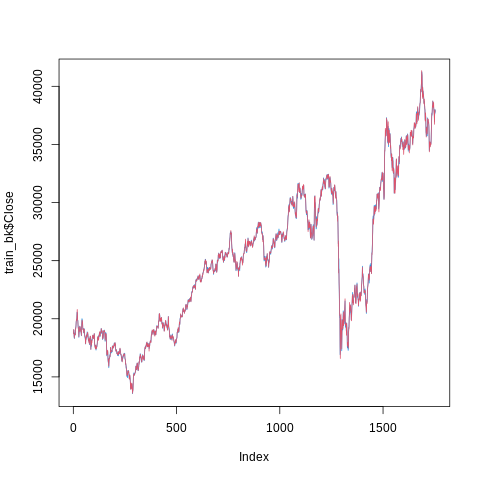

In [ ]:
%%R
plot(train_bk$Close,type="l",col=4)
lines(fitted(f_lm_dn), col = 2)

Unfortunately Time series regression is throwing error due to change is library stucture used in Hyndman latest book, that is my guess!!

Let approach instead with dynamic regression model

In [ ]:
%%R


fit1 <- auto.arima(as.ts(train_bk[,"Close"]), xreg=as.matrix(train_bk[,c("Open","High","Low","Volume","Turnover","Days2Expiry")]))
fit_lag <- Arima(train_bk[,"Close"], xreg=as.matrix(train_bk[,c("Open","High","Low","Volume","Turnover","Days2Expiry")]),order=c(fit1$arma[1],fit1$arma[6],fit1$arma[2]),seasonal = list(order=c(fit1$arma[3],fit1$arma[7],fit1$arma[4]),period=fit1$arma[5]))
Box.test(residuals(fit_lag),lag=10,type="Ljung")# Box test shows that the residuals are not autocorrelated
#xreg_fc<-rbind(c(369,3551,8958,2130,1818),c(197430,2402,3551,8958,2130),c(60813,2621,2402,3551,8958))
fcast_xreg <- forecast(fit1,xreg=as.matrix(test_bk[,c("Open","High","Low","Volume","Turnover","Days2Expiry")]))
fcast_xreg
# new data
# xreg_new=data.frame("Open"=33765,"High"=34358,"Low"=33658,"Volume"=129371809,"Turnover"=4518,"Days2Expiry"=7)
# fcst_new<-forecast(fit_lag,xreg=as.matrix(xreg_new))

#########  NULL of BOX_LJUNG Test is that model fits fine(no lack of fit) & 
#significant P values would be A significant p-value in this test rejects the null hypothesis that the time series isn't autocorrelated.#########




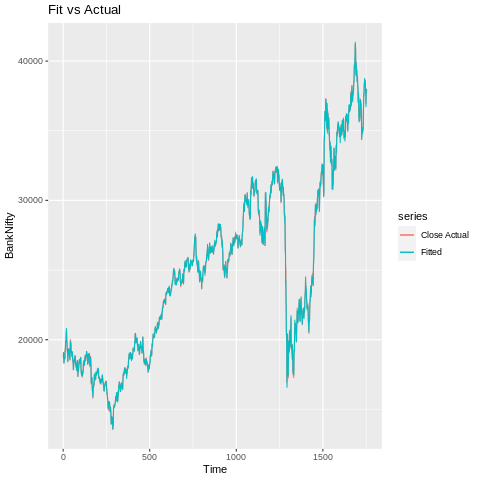

In [ ]:
%%R
autoplot(as.ts(train_bk[,'Close']), series="Close Actual") +
  autolayer(fitted(fcast_xreg), series="Fitted")+ylab("BankNifty")+ggtitle("Fit vs Actual")



In [ ]:
%%R
accuracy(fit_lag)
result_arimax<-data.frame(Output=fcast_xreg$mean,Test=test_bk$Close)
result_arimax<-result_arimax %>% mutate(delta=Output-Test)
mean(result_arimax$delta)
sd(result_arimax$delta)

[1] 189.5576


In [ ]:
%%R -i df_in

#for Dynamic regression using FPP/Forecast package
xreg_new=data.frame("Open"=as.numeric(df_in[1,1]),"High"=as.numeric(df_in[1,2]),"Low"=as.numeric(df_in[1,3]),"Volume"=as.numeric(df_in[1,4]),"Turnover"=as.numeric(df_in[1,5])/10^7,"Days2Expiry"=7)
#turnover is in cr in the base data
fcst_new<-forecast(fit_lag,xreg=as.matrix(xreg_new))
fcst_new
#bknifty_curr<-data.frame(data=unlist((ln[[4]][[1]])))

# using DYNLM PACKAGE
pred_dynlm<-predict(f_lm_dn,newdata = xreg_new)
pred_dynlm

bind_rows(data.frame(fcst_new,row.names="Forecast Package"),data.frame(Point.Forecast=pred_dynlm,row.names="DYNLM Package"))



                 Point.Forecast    Lo.80    Hi.80    Lo.95   Hi.95
Forecast Package       15777.13 15625.71 15928.54 15545.56 16008.7
DYNLM Package          15777.13       NA       NA       NA      NA


In [ ]:
%%R
dim(bk_lag)

[1] 1814   12


In [ ]:
%%R
head(bank_csv)
bk_lag<-bank_csv %>% mutate(PreClose=lag(Close,1),Opn2prevClose=Open-PreClose,Open2High=Open-High,Open2Low=Open-Low,High2Low=High-Low)
bk_lag<-bk_lag[-1,] # excluding first column

In [ ]:
%%R
bk_lag$Date <-ymd(bk_lag$Date)

# lets add a feature to capture the no of days from expiry, weekly expiry in case of banknifty
# week_start uses Monday as 1 for week starting date
bk_lag <-  bk_lag %>%  mutate(Days2Expiry = wday(Date,week_start = 4))
bk_lag$Days2Expiry <-bk_lag$Days2Expiry#as.f`ctors

In [ ]:
%%R
train_bk_lag<-bk_lag %>%  dplyr::filter(Date <= "2022-01-31",Date!="2021-11-01") %>% dplyr::mutate_at(vars("Volume"),as.numeric) %>% dplyr::mutate_at(vars("Turnover"),as.numeric) %>% distinct(Date,.keep_all=TRUE) 

#%>% as_tsibble()%>% dplyr::mutate_at(vars("Days2Expiry"),as.factor)#%>% dplyr::select(-X) #%>% dplyr::mutate_at(vars("Days2Expiry"),as.factor)
test_bk_lag<-bk_lag %>%  dplyr::filter(Date > "2022-01-31")#  %>% distinct(Date,.keep_all=TRUE) # %>% as_tsibble()%>% dplyr::select(-X)  #%>% dplyr::mutate_at(vars("Days2Expiry"),as.factor)# %>% mutate(as.numeric(Days2Expiry))

# train_bk<-apply(train_bk[,2:8],2,function(x) diff(log(x), lag=1))
# test_bk<-apply(test_bk[,2:8],2,function(x) diff(log(x), lag=1))

In [ ]:
%%R
glimpse(train_bk_lag)

Rows: 1,752
Columns: 13
$ Date          <date> 2015-01-02, 2015-01-05, 2015-01-06, 2015-01-07, 2015-01…
$ Open          <dbl> 18752.20, 19155.20, 18874.60, 18382.55, 18587.10, 18845.…
$ High          <dbl> 19118.85, 19166.00, 18874.60, 18482.05, 18752.30, 18864.…
$ Low           <dbl> 18752.20, 18987.70, 18388.35, 18211.50, 18486.20, 18479.…
$ Close         <dbl> 19057.80, 19017.40, 18430.75, 18304.25, 18701.40, 18637.…
$ Volume        <dbl> 41288039, 36318747, 52069776, 58241387, 47744703, 518485…
$ Turnover      <dbl> 1713.48, 1497.40, 2124.64, 2341.58, 2208.70, 2360.78, 14…
$ Days2Expiry   <dbl> 2, 5, 6, 7, 1, 2, 5, 6, 7, 1, 2, 5, 6, 7, 1, 2, 6, 7, 1,…
$ PreClose      <dbl> 18750.45, 19057.80, 19017.40, 18430.75, 18304.25, 18701.…
$ Opn2prevClose <dbl> 1.75, 97.40, -142.80, -48.20, 282.85, 144.50, -5.25, 93.…
$ Open2High     <dbl> -366.65, -10.80, 0.00, -99.50, -165.20, -18.10, -190.05,…
$ Open2Low      <dbl> 0.00, 167.50, 486.25, 171.05, 100.90, 366.25, 101.90, 24…
$ High2Low      

In [ ]:
%%R


# fit1_new <- auto.arima(as.ts(train_bk_lag[,"Close"]), xreg=as.matrix(train_bk_lag[,c("Open","Volume","Turnover","Days2Expiry","Opn2prevClose", "Open2High" , "Open2Low" ,
# "High2Low")]))

# str(fit1_new)

# fit_lag_new <- Arima(train_bk_lag[,"Close"], xreg=as.matrix(train_bk_lag[,c("Open","Volume","Turnover","Days2Expiry","Opn2prevClose", "Open2High" , "Open2Low",     
# "High2Low")]),order=c(fit1_new$arma[1],fit1_new$arma[6],fit1_new$arma[2]),seasonal = list(order=c(fit1_new$arma[3],fit1_new$arma[7],fit1_new$arma[4]),period=fit1_new$arma[5]))
# Box.test(residuals(fit_lag_new),lag=10,type="Ljung")# Box test shows that the residuals are not autocorrelated
# xreg_fc<-rbind(c(369,3551,8958,2130,1818),c(197430,2402,3551,8958,2130),c(60813,2621,2402,3551,8958))
# fcast_xreg_new <- forecast(fit_lag_new,xreg=as.matrix(test_bk_lag[,c("Open","Volume","Turnover","Days2Expiry","Opn2prevClose", "Open2High" , "Open2Low"     
# "High2Low")]))
# fcast_xreg_new
#  new data
# xreg_new_lag=data.frame(test_bk_lag)
# fcst_new_lag<-forecast(fit_lag,xreg=as.matrix(xreg_new_lag))

#########  NULL of BOX_LJUNG Test is that model fits fine(no lack of fit) & 
#significant P values would be A significant p-value in this test rejects the null hypothesis that the time series isn't autocorrelated.#########

# saveRDS(model, file = "model.rds")
# 
# Afterwards you can use
# 

# loadedModel <- readRDS(model.rds)

NULL


Due to issues with ARIMAX , we again resort DYNLM package

In [ ]:
%%R


f_lm_dn_new<-dynlm(Close ~ Open+Turnover+Volume+Days2Expiry+Opn2prevClose+Open2High+Open2Low+High2Low,data=train_bk_lag)
pred_new<-predict(f_lm_dn_new,newdata = test_bk_lag[,c("Open","Turnover","Volume","Days2Expiry","Opn2prevClose", "Open2High" , "Open2Low" ,
"High2Low")])
coeftest(f_lm_dn_new, vcov. = NULL)


t test of coefficients:

                 Estimate  Std. Error   t value  Pr(>|t|)    
(Intercept)   -7.7959e+00  1.2753e+01   -0.6113  0.541086    
Open           1.0004e+00  4.9966e-04 2002.1752 < 2.2e-16 ***
Turnover      -4.8793e-03  2.0506e-03   -2.3794  0.017448 *  
Volume         3.9006e-08  3.7904e-08    1.0291  0.303594    
Days2Expiry   -1.6075e-01  1.2200e+00   -0.1318  0.895188    
Opn2prevClose  3.7019e-02  1.3023e-02    2.8427  0.004526 ** 
Open2High     -9.0720e-01  1.5713e-02  -57.7371 < 2.2e-16 ***
Open2Low      -7.6170e-01  1.4209e-02  -53.6061 < 2.2e-16 ***
High2Low               NA          NA        NA        NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



In [ ]:
%%R
# using NNETAR method, input ashoukd be a DF
train_bk_df=as.data.frame(train_bk_lag) %>% na.omit()
train_bk_df

In [ ]:
%%R

train_bk_df=as.data.frame(train_bk_lag) %>% na.omit()
fitNnet <- nnetar(as.ts(train_bk_df[,"Close"]), xreg=train_bk_df[,c("Open","Volume","Turnover","Days2Expiry","Opn2prevClose", "Open2High" , "Open2Low" ,
"High2Low")])

#xreg_fc<-rbind(c(369,3551,8958,2130,1818),c(197430,2402,3551,8958,2130),c(60813,2621,2402,3551,8958))
fcast_nnet <- forecast(fitNnet,xreg=as.matrix(test_bk_lag[,c("Open","Volume","Turnover","Days2Expiry","Opn2prevClose", "Open2High" , "Open2Low" ,
"High2Low")]))
fcast_nnet
#  new data




In [ ]:
%%R
Box.test(residuals(fitNnet),lag=2,type="Ljung")
# null is no Auto correlation,  since the p value is below the threshold(very low) , the null has to be rejected thus Box test shows that the residuals are  autocorrelated
# hence this model cannot be relied upon


	Box-Ljung test

data:  residuals(fitNnet)
X-squared = 19.076, df = 2, p-value = 7.206e-05



Forecasting both using NNETAR & DYNLM model

DYNLM seems to be performing exceptioanlly well

In [ ]:
%%R -i df_in


xreg_new_nn=data.frame("Open"=as.numeric(df_in[1,1]),"Volume"=as.numeric(df_in[1,4]),"Turnover"=as.numeric(df_in[1,5])/10^7,"Opn2prevClose"=as.numeric(df_in[1,1]-df_in[1,6]), "Open2High"=as.numeric(df_in[1,1]-df_in[1,2]) , "Open2Low"=as.numeric(df_in[1,1]-df_in[1,3]) ,
"High2Low"=as.numeric(df_in[1,2]-df_in[1,3]),"Days2Expiry"=5)

fcst_new_nnet<-forecast(fitNnet,xreg=as.matrix(xreg_new_nn))

result_nnet<-data.frame(Output=fcast_nnet$mean,Test=test_bk$Close) %>% mutate(delta=Output-Test)
fcst_new_dyn<-predict(f_lm_dn_new,newdata =xreg_new_nn )

bind_rows(data.frame(Point.Forecast=fcst_new_nnet,row.names="NNETAR"),data.frame(Point.Forecast=fcst_new_dyn,row.names="DYNLM"))
#result_nnet

       Point.Forecast
NNETAR       18572.33
DYNLM        15758.47


Save Model for later use:
saveRDS(f_lm_dn_new, file = "dynlm_new.rds")

Afterwards you can use load the model

loadedModel <- readRDS("dynlm_new.rds") and then pass new data to the predict function

predict(loadedModel,xreg_new_nn)

In [ ]:
%%R
saveRDS(f_lm_dn_new, file = "/content/drive/MyDrive/ModelOutput/dynlm_new.rds")#  based on new measure , not using High & low data
saveRDS(fitNnet,file="/content/drive/MyDrive/ModelOutput/nnetar_new.rds")#based on new measure , not using High & low data
saveRDS(f_lm_dn ,file="/content/drive/MyDrive/ModelOutput/dynlm_classic.rds") # based on OHLC measure
saveRDS(fit_lag,file="/content/drive/MyDrive/ModelOutput/arimax_classic.rds")# using the initial modelling approach of including High ,Low values
# 
# Afterwards you can use
# 
# loadedModel <- readRDS(model.rds)

In [ ]:
%%R
loadedModel <- readRDS("dynlm_new.rds")

R[write to console]: Error in gzfile(file, "rb") : cannot open the connection

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In predict.lm(readRDS("/content/drive/MyDrive/ModelOutput/dynlm_new.rds"),  :
R[write to console]: 
 
R[write to console]:  prediction from a rank-deficient fit may be misleading

R[write to console]: 2: 
R[write to console]: In forecast.nnetar(readRDS("/content/drive/MyDrive/ModelOutput/nnetar_new.rds"),  :
R[write to console]: 
 
R[write to console]:  xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.

R[write to console]: 3: 
R[write to console]: In gzfile(file, "rb") :
R[write to console]: 
 
R[write to console]:  cannot open compressed file 'dynlm_new.rds', probable reason 'No such file or directory'




Error in gzfile(file, "rb") : cannot open the connection


RInterpreterError: ignored

Now that we have trained and saved the model, let use the below code to extract data from NSE site.
Basically we use python REQUEST library to pull almost real time data use NSE API



In [ ]:
%load_ext rpy2.ipython

TO import downloaded R packages and make it available to the current R session in colab

In [ ]:
#Copy it in your working directory
!cp /content/drive/MyDrive/src/library.tar.gz
!du -sh /content/drive/MyDrive/src/library.tar.gz
#Extract installed packaged from the zipped file
!tar xf /content/drive/MyDrive/src/library.tar.gz

#/content/drive/MyDrive/src/library.tar.gz


cp: missing destination file operand after '/content/drive/MyDrive/src/library.tar.gz'
Try 'cp --help' for more information.
1.2M	/content/drive/MyDrive/src/library.tar.gz
tar: Removing leading `/' from member names


In [ ]:
%%R
#Extract the installed packages from the zipped file.
.libPaths('usr/local/lib/R/site-library/')

In [ ]:
%%R
library(forecast)
#library(fpp3)
library(lubridate)
library(dynlm)
library(DBI)
library(RSQLite)
library(tidyverse)
library(dbplyr)
library(readr)

R[write to console]: Error in library(forecast) : there is no package called ‘forecast’




Error in library(forecast) : there is no package called ‘forecast’


RInterpreterError: ignored

In [ ]:
%%R
library(tidyverse)
library(lubridate)
#exp_date=read_csv("/content/drive/MyDrive/Expiry2022.csv",show_col_types = FALSE)
exp_dt=c('6-Jan-2022','13-Jan-2022','20-Jan-2022','27-Jan-2022','3-Feb-2022','10-Feb-2022','17-Feb-2022','24-Feb-2022','3-Mar-2022','10-Mar-2022','17-Mar-2022','24-Mar-2022','31-Mar-2022','7-Apr-2022','13-Apr-2022','21-Apr-2022','28-Apr-2022','5-May-2022','12-May-2022','19-May-2022','26-May-2022','2-Jun-2022','9-Jun-2022','16-Jun-2022','23-Jun-2022','30-Jun-2022','7-Jul-2022','14-Jul-2022','21-Jul-2022','28-Jul-2022','4-Aug-2022','11-Aug-2022','18-Aug-2022','25-Aug-2022','1-Sep-2022','8-Sep-2022','15-Sep-2022','22-Sep-2022','29-Sep-2022','6-Oct-2022','13-Oct-2022','20-Oct-2022','27-Oct-2022','3-Nov-2022','10-Nov-2022','17-Nov-2022','24-Nov-2022','1-Dec-2022','8-Dec-2022','15-Dec-2022','22-Dec-2022','29-Dec-2022')
expiry_date=data.frame(ExpD=lubridate::dmy(exp_dt))%>%
mutate(DiffDate=difftime(ExpD,ymd(Sys.Date()),unit="days"))%>%
mutate(DiffDate=difftime(ExpD,ymd(Sys.Date()),unit="days")) %>% 
mutate(DiffDate=as.numeric(DiffDate)) %>% filter(DiffDate>0) 

print(head(expiry_date$DiffDate,n=1))




R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: 
Attaching package: ‘lubridate’


R[write to console]: The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




[1] 1


In [ ]:
getIndex=input('IndexCode? NIFTY,BANKNIFTY--') 
getIndex=getIndex.upper()

IndexCode? NIFTY,BANKNIFTY--nifty


In [ ]:
import requests
import numpy as np
import pandas as pd
from datetime import datetime
import json
url_oc = r"https://www.nseindia.com/option-chain"
#url_oc ="https://web.sensibull.com/option-chain?expiry=2021-02-04&tradingsymbol=NIFTY"
#url=f"https://www.nseindia.com/api/option-chain-indices?symbol=NIFTY"

# This url seem to work 
if getIndex=="BANKNIFTY":
#"https://www.nseindia.com/api/quote-derivative?symbol=BANKNIFTY"
  url = r"https://www.nseindia.com/api/equity-stockIndices?index=NIFTY%20BANK"

else:
  url=r"https://www.nseindia.com/api/equity-stockIndices?index=NIFTY%2050"
#url
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, '
                         'like Gecko) '
                         'Chrome/80.0.3987.149 Safari/537.36',
           'accept-language': 'en,gu;q=0.9,hi;q=0.8', 'accept-encoding': 'gzip, deflate, br'}
session = requests.Session()
request = session.get(url_oc, headers=headers, timeout=5)
cookies = dict(request.cookies)
response = session.get(url, headers=headers, timeout=5, cookies=cookies)
js=response.json()
#jsp=json.dumps(list(js.values())[1]['data'])
#dict_keys(['name', 'advance', 'timestamp', 'data', 'metadata', 'marketStatus', 'date30dAgo', 'date365dAgo'])
''' above dictionary output shows the the keys returned by NSE API , 
to extract relevant data we will use Pandas json_normalize function to 
get the revelant output from deeply nested list
'''
#df1=pd.json_normalize(js['data'])



' above dictionary output shows the the keys returned by NSE API , \nto extract relevant data we will use Pandas json_normalize function to \nget the revelant output from deeply nested list\n'

In [ ]:
df1=pd.json_normalize(js['data'])

df_in=df1[['symbol', 'identifier', 'open', 'dayHigh', 'dayLow',
       'lastPrice', 'previousClose', 'change', 'pChange', 'ffmc', 'yearHigh',
       'yearLow', 'totalTradedVolume', 'totalTradedValue']]
if getIndex =="NIFTY":
  df_in=df_in[df_in['symbol']=="NIFTY 50"]
else:
  df_in=df_in[df_in['symbol']=="NIFTY BANK"] #"NIFTY BANK"
# seekcting relevant columns
df_in=df_in[['open', 'dayHigh', 'dayLow','totalTradedVolume', 'totalTradedValue','previousClose']]
df_curr=df1[['lastPrice']]
print('Current Price:' ,df_curr.iloc[0,0])
print(df_in)




Current Price: 16126.9
      open  dayHigh   dayLow  totalTradedVolume  totalTradedValue  \
0  16128.2  16139.6  16102.2           26102191      2.054323e+10   

   previousClose  
0        16058.3  


To get recent expiry date, currently applicable for bank Nifty only
need to tweak code for other scripts which are not on weekly expiry

In [ ]:
%%R -i df_in

df_in

# # for Dynamic regression using FPP/Forecast package
xreg_new=data.frame("Open"=as.numeric(df_in[1,1]),"High"=as.numeric(df_in[1,2]),"Low"=as.numeric(df_in[1,3]),"Volume"=as.numeric(df_in[1,4]),"Turnover"=as.numeric(df_in[1,5])/10^7,"Days2Expiry"=min(expiry_date$DiffDate))
#turnover is in cr in the base data

xreg_new_nn=data.frame("Open"=as.numeric(df_in[1,1]),"Volume"=as.numeric(df_in[1,4]),"Turnover"=as.numeric(df_in[1,5])/10^7,"Opn2prevClose"=as.numeric(df_in[1,1]-df_in[1,6]), "Open2High"=as.numeric(df_in[1,1]-df_in[1,2]) , "Open2Low"=as.numeric(df_in[1,1]-df_in[1,3]) ,
"High2Low"=as.numeric(df_in[1,2]-df_in[1,3]),"Days2Expiry"=min(expiry_date$DiffDate))

print(bind_rows(xreg_new,xreg_new_nn))

     Open     High      Low    Volume Turnover Days2Expiry Opn2prevClose
1 16126.2 16158.75 16031.15 208648707 16042.41           1            NA
2 16126.2       NA       NA 208648707 16042.41           1         -89.8
  Open2High Open2Low High2Low
1        NA       NA       NA
2    -32.55    95.05    127.6


In [ ]:
%%R
#install.packages("forecast")
# library(forecast)
dy_new=predict(readRDS("/content/drive/MyDrive/ModelOutput/dynlm_new.rds"),newdata=xreg_new_nn)
# nn_new=forecast(readRDS("/content/drive/MyDrive/ModelOutput/nnetar_new.rds"),xreg=as.matrix(xreg_new_nn))
dy_ohlc=predict(readRDS("/content/drive/MyDrive/ModelOutput/dynlm_classic.rds"),newdata=xreg_new)
# arimax_ohlc=forecast(readRDS("/content/drive/MyDrive/ModelOutput/arimax_classic.rds"),xreg=as.matrix(xreg_new))

# bind_rows(data.frame(Point.Forecast=nn_new,row.names="NNETAR"),data.frame(Point.Forecast=dy_new,row.names="DYNLM_wit_add._feature"),data.frame(arimax_ohlc,row.names="Forecast Package"),data.frame(Point.Forecast=dy_ohlc,row.names="DYNLM Package"))

bind_rows(data.frame(Point.Forecast=dy_new,row.names="DYNLM_wit_add._feature"),data.frame(Point.Forecast=dy_ohlc,row.names="DYNLM Package"))

                       Point.Forecast
DYNLM_wit_add._feature       16008.37
DYNLM Package                16025.97
